In [2]:
import os
import torch
import numpy as np

from conditional_rate_matching.data.dataloaders_utils import get_dataloaders_crm
from conditional_rate_matching.models.generative_models.crm import uniform_pair_x0_x1
from conditional_rate_matching.configs.configs_classes.config_crm import CRMConfig as ConditionalRateMatchingConfig

from conditional_rate_matching.models.generative_models.crm import (
    CRM
)

from conditional_rate_matching.configs.config_files import ExperimentFiles
from conditional_rate_matching.models.trainers.crm_trainer import CRMTrainer
from conditional_rate_matching.configs.config_files import get_experiment_dir
from conditional_rate_matching.configs.configs_classes.config_crm import CRMConfig

from conditional_rate_matching.utils.plots.images_plots import plot_sample
from conditional_rate_matching.models.pipelines.sdes_samplers.samplers import TauLeaping
from conditional_rate_matching.configs.experiments_configs.crm.crm_experiments_nist import experiment_nist

from matplotlib import cm
from matplotlib import pyplot as plt
import networkx as nx

options = {
    'node_size': 2,
    'edge_color': 'black',
    'linewidths': 1,
    'width': 0.5
}

from conditional_rate_matching import plots_path
from conditional_rate_matching.models.trainers.call_all_trainers import call_trainer

from conditional_rate_matching.configs.experiments_configs.crm.crm_experiments_graph_bridge import experiment_grid_bridge
from conditional_rate_matching.configs.experiments_configs.crm.crm_experiments_graph_bridge import experiment_ego_bridge
from conditional_rate_matching.configs.experiments_configs.crm.crm_experiments_graph_bridge import experiment_comunity_small_bridge

In [3]:
from conditional_rate_matching.models.pipelines.thermostat.crm_thermostat_config import LogThermostatConfig
from conditional_rate_matching.models.pipelines.thermostat.crm_thermostat_config import ExponentialThermostatConfig
from conditional_rate_matching.models.pipelines.thermostat.crm_thermostat_config import InvertedExponentialThermostatConfig

In [4]:
from conditional_rate_matching.utils.plots.graph_plots import plot_graph_noise_path

In [18]:
number_of_images = 3
number_of_noise_steps = 20

In [7]:
from pprint import pprint
from dataclasses import asdict

config_community_gamma_1 = experiment_comunity_small_bridge(number_of_epochs=300,network="mlp")
config_community_gamma_1.thermostat.gamma = 1.
experiment_indentifier = "community_bridge_mlp_gamma_1"

try:
    results,metrics = call_trainer(config_community_gamma_1,
                                   experiment_name="prenzlauer_experiment",
                                   experiment_type="crm",
                                   experiment_indentifier=experiment_indentifier)
except:
    pass
    
experiment_dir = get_experiment_dir(experiment_name="prenzlauer_experiment",
                                    experiment_type="crm",
                                    experiment_indentifier=experiment_indentifier)

save_path = os.path.join(plots_path,experiment_indentifier+".png")
crm_community_bridge_mlp_gamma_1 = CRM(experiment_dir=experiment_dir, device=torch.device("cpu"))

1000it [00:02, 488.75it/s]


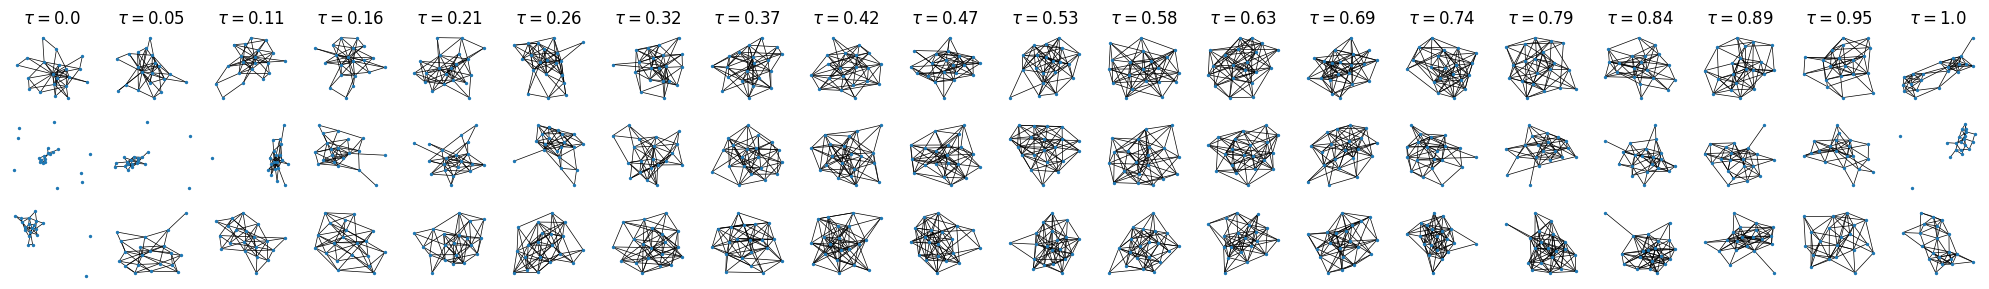

In [10]:
plot_graph_noise_path(crm_community_bridge_mlp_gamma_1,number_of_images,number_of_noise_steps,save_path)

C:\Users\cesar\Desktop\Projects\DiffusiveGenerativeModelling\Codes\conditional_rate_matching\results\prenzlauer_experiment\crm\community_bridge_mlp_exp


1000it [00:02, 365.18it/s]


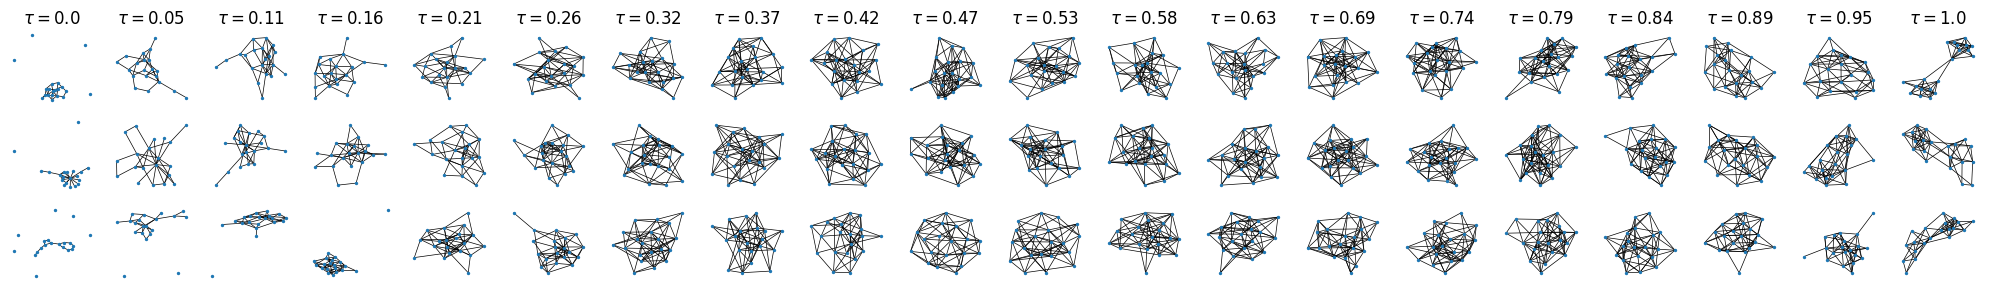

In [21]:
from pprint import pprint
from dataclasses import asdict

config_community_exp = experiment_comunity_small_bridge(number_of_epochs=300,network="mlp")
config_community_exp.thermostat = ExponentialThermostatConfig(max=1.,gamma=1.)
experiment_indentifier = "community_bridge_mlp_exp"

try:
    results,metrics = call_trainer(config_community_exp,
                                   experiment_name="prenzlauer_experiment",
                                   experiment_type="crm",
                                   experiment_indentifier=experiment_indentifier)
except:
    pass
    
experiment_dir = get_experiment_dir(experiment_name="prenzlauer_experiment",
                                    experiment_type="crm",
                                    experiment_indentifier=experiment_indentifier)
print(experiment_dir)
save_path = os.path.join(plots_path,experiment_indentifier+".png")
crm_community_exp = CRM(experiment_dir=experiment_dir, device=torch.device("cpu"))
plot_graph_noise_path(crm_community_exp,number_of_images,number_of_noise_steps,save_path)

C:\Users\cesar\Desktop\Projects\DiffusiveGenerativeModelling\Codes\conditional_rate_matching\results\prenzlauer_experiment\crm\community_bridge_mlp_inv_exp


1000it [00:02, 389.62it/s]


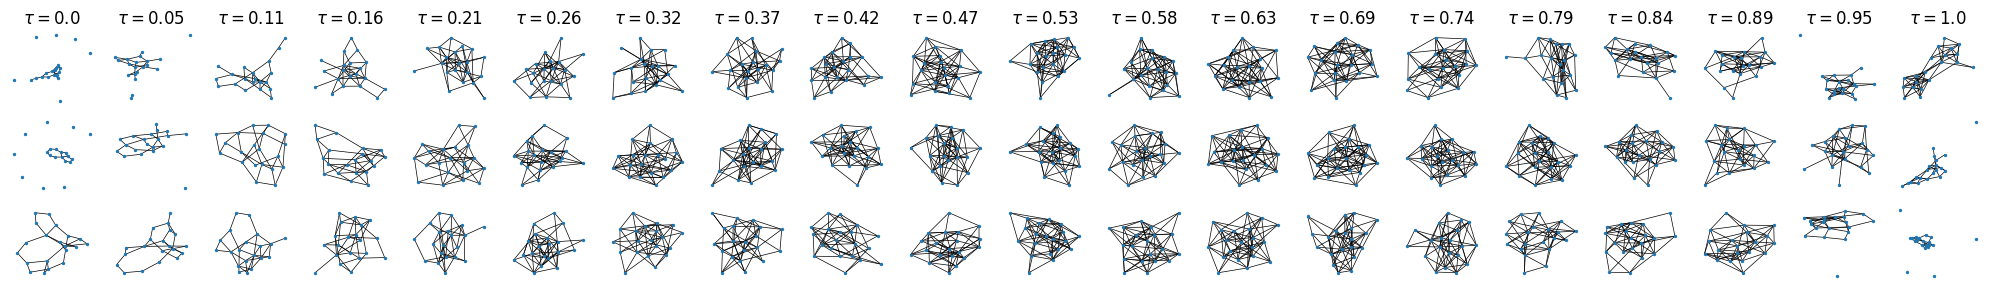

In [23]:
from pprint import pprint
from dataclasses import asdict

config_community_inv_exp = experiment_comunity_small_bridge(number_of_epochs=300,network="mlp")
config_community_inv_exp.thermostat = InvertedExponentialThermostatConfig(max=1.,gamma=1.)
experiment_indentifier = "community_bridge_mlp_inv_exp"

try:
    results,metrics = call_trainer(config_community_inv_exp,
                                   experiment_name="prenzlauer_experiment",
                                   experiment_type="crm",
                                   experiment_indentifier=experiment_indentifier)
except:
    pass
    
experiment_dir = get_experiment_dir(experiment_name="prenzlauer_experiment",
                                    experiment_type="crm",
                                    experiment_indentifier=experiment_indentifier)
print(experiment_dir)
save_path = os.path.join(plots_path,experiment_indentifier+".png")
config_community_inv_exp = CRM(experiment_dir=experiment_dir, device=torch.device("cpu"))
plot_graph_noise_path(config_community_inv_exp,number_of_images,number_of_noise_steps,save_path)

C:\Users\cesar\Desktop\Projects\DiffusiveGenerativeModelling\Codes\conditional_rate_matching\results\prenzlauer_experiment\crm\community_bridge_log


1000it [00:02, 410.57it/s]


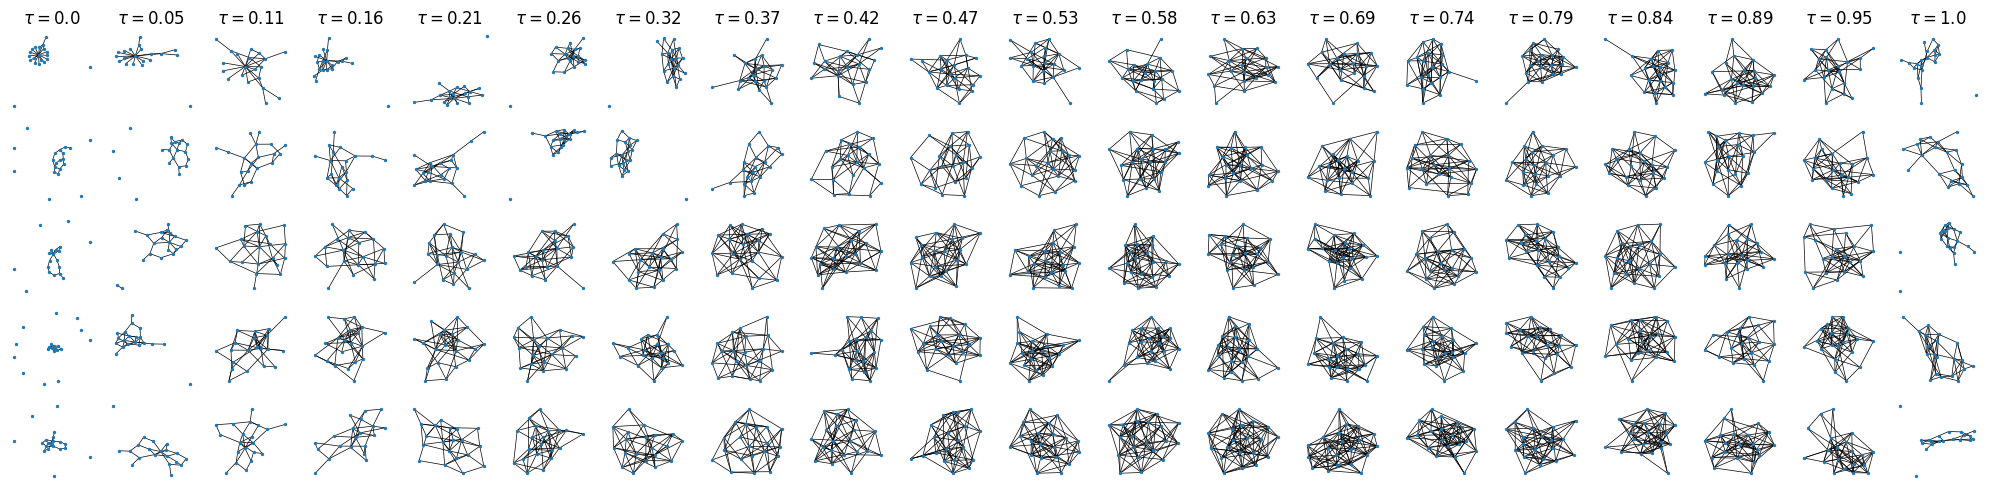

In [26]:
from pprint import pprint
from dataclasses import asdict

config_community_log = experiment_comunity_small_bridge(number_of_epochs=300,network="mlp")
config_community_log.thermostat = LogThermostatConfig()
experiment_indentifier = "community_bridge_log"

try:
    results,metrics = call_trainer(config_community_log,
                                   experiment_name="prenzlauer_experiment",
                                   experiment_type="crm",
                                   experiment_indentifier=experiment_indentifier)
except:
    pass
    
experiment_dir = get_experiment_dir(experiment_name="prenzlauer_experiment",
                                    experiment_type="crm",
                                    experiment_indentifier=experiment_indentifier)
print(experiment_dir)
save_path = os.path.join(plots_path,experiment_indentifier+".png")
config_community_log = CRM(experiment_dir=experiment_dir, device=torch.device("cpu"))
plot_graph_noise_path(config_community_log,5,number_of_noise_steps,save_path)